## Dataset

House prediction dataset:

`https://www.kaggle.com/datasets/harlfoxem/housesalesprediction`

The dataset that contains house prices for King county, which includes Seattle.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
df = pd.read_csv('../data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Linear Regression
A method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (Y)

The results of a linear regression is a function that predicts the response variable as a function of the predictor

$
\widehat{Y} = a + bX
$

- `a` refers to the `intercept` of the line
- `b` refers to the `slope`

In [ ]:
from sklearn.linear_model import LinearRegression

In [9]:
# Create a linear regression object
lm = LinearRegression()
lm

LinearRegression()

### How could the `sqft_living` helps us predict the house `price`?

In [ ]:
X = df[['sqft_living']] # This needs to be a 2D array
Y = df['price'] # This can be 1D

In [12]:
# Fit linear model
lm.fit(X, Y)

LinearRegression()

In [14]:
# Get the output prediction using X
Yhat = lm.predict(X)
# Print the first 5 results
Yhat[:5] # what the model this the price should be based on sqrt_living

array([287555.06702452, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [16]:
# Get the value of the intercept (a)
lm.intercept_

-43580.74309447361

In [18]:
# Get the value of the slope (b)
lm.coef_

array([280.6235679])

Final estimated linear model

$
\widehat{Y} = a + bX
$

In our case

$
price = -43580.74 + 280.62356X
$

In [20]:
yhat = -43580.74 + 280.62356 * X
print(f'Using X price = { Yhat}')
# or using price
price = -43580.74 + 280.62356 * df['sqft_living']
print(f'Using price = {price}')

Using X price = [287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]
Using price = 0        287555.0608
1        677621.8092
2        172499.4012
3        506441.4376
4        427866.8408
            ...     
21608    385773.3068
21609    604659.6836
21610    242655.2912
21611    405416.9560
21612    242655.2912
Name: sqft_living, Length: 21613, dtype: float64


## Task 1
Repeat the process (Linear Model) but using `bedrooms` as the independent variable and `price` as your dependent variable

In [23]:
X_bedrooms = df[['bedrooms']]
Y = df['price']

lm2 = LinearRegression()
lm2.fit(X_bedrooms, Y)
print(f'intercept: {lm2.intercept_}')
print(f'slope: {lm2.coef_}')

intercept: 129802.35631825868
slope: [121716.12651184]


In [26]:
Yhat = 129802.35631825868 + 121716.12651184 * X_bedrooms
print(f'Using X bedroom = {Yhat}')
# or using price
price = 129802.35631825868 + 121716.12651184 * df['bedrooms']
print(f'Using bedrooms = {price}')

Using X bedroom =             bedrooms
0      494950.735854
1      494950.735854
2      373234.609342
3      616666.862366
4      494950.735854
...              ...
21608  494950.735854
21609  616666.862366
21610  373234.609342
21611  494950.735854
21612  373234.609342

[21613 rows x 1 columns]
Using bedrooms = 0        494950.735854
1        494950.735854
2        373234.609342
3        616666.862366
4        494950.735854
             ...      
21608    494950.735854
21609    616666.862366
21610    373234.609342
21611    494950.735854
21612    373234.609342
Name: bedrooms, Length: 21613, dtype: float64


## Multiple Linear Regression
If you want to use more variables in our model to predict the price then, use a `multiple linear regression`

$
\widehat{Y} = a + b_{1}X_{1} + b_{2}X_{2} + b_{3}X_{3} ... b_{n}X_{n}
$

For this example good predictors of price will be:
- sqft_living
- bedrooms
- bathrooms
- sqft_lot

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load data
df = pd.read_csv('../data/kc_house_data.csv')

In [31]:
# Get all the predictor variables
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']] # 2d
Y = df['price']

In [33]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [40]:
# Get the intercept (a)
a = lm.intercept_
a

79092.32040168764

In [41]:
# Get the intercept b1, b2, b3, b4
bs =  list(lm.coef_)
bs

[314.29172074654895, -59406.81240543545, 6268.66040182378, -0.3776525788414961]

In [43]:
Yhat = a + ((bs[0] * X['sqft_living']) + (bs[1] * X['bedrooms']) + (bs[2] * X['bathrooms']) + (bs[3] * X['sqft_lot']))
Yhat

0        275871.036998
1        719971.131432
2        204775.455179
3        474394.561754
4        438367.862006
             ...      
21608    396982.741865
21609    580955.302268
21610    285047.915072
21611    418508.453026
21612    285151.391879
Length: 21613, dtype: float64

### Model Evaluation Using Visualization

### Regression Plot
Regression plots are a great tool to plot Linear Regression.  This plot shows a combination for a scatter plot and a linear regression line.

(0.0, 8083960.948048565)

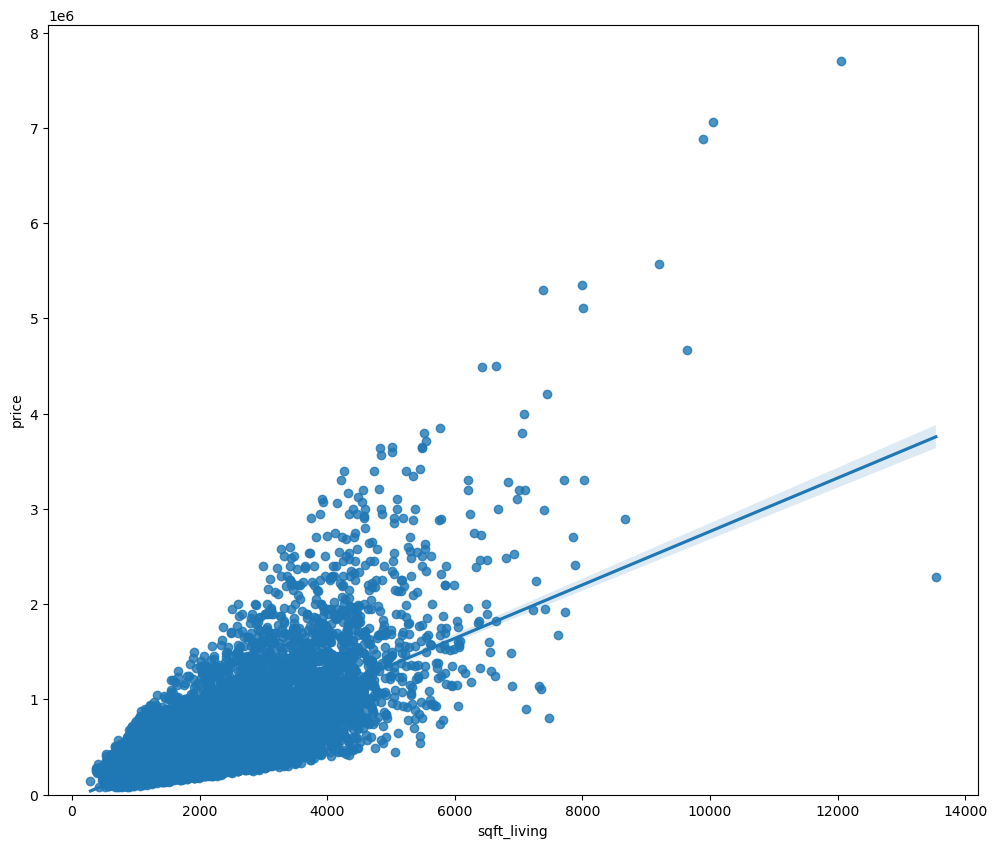

In [44]:
width = 12
height = 10
# plot the figure
plt.figure(figsize=(width, height))
sns.regplot(x='sqft_living', y = 'price', data= df)
plt.ylim(0,) # ylim is use to set the limit for the y-axis


(0.0, 8081250.0)

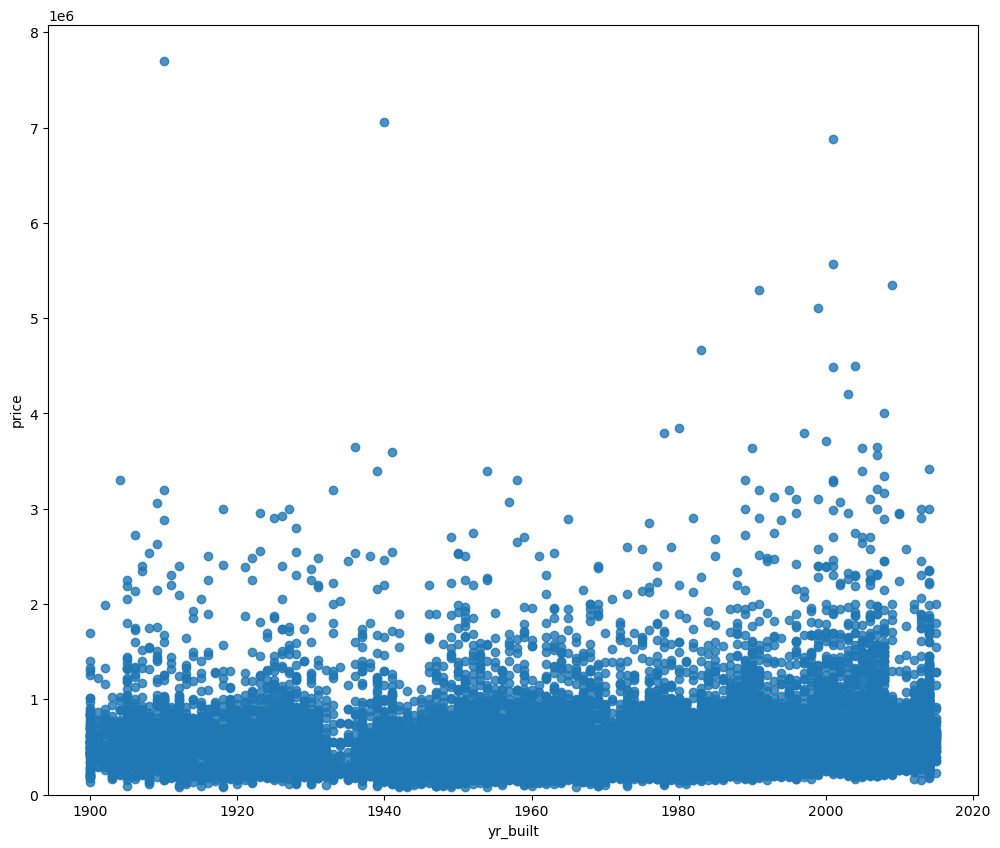

In [45]:
# Compare not versus the price
plt.figure(figsize=(width, height))
sns.regplot(x='yr_built', y='price', data=df)
plt.ylim(0,)  # ylim is use to set the limit for the y-axis

### Residual Plot
This is a good way to visualize the `variance` of the data.
- `Residual` is the difference between the `observed value (y)` and the `predicted value (Yhat)`

<Axes: xlabel='sqft_living', ylabel='price'>

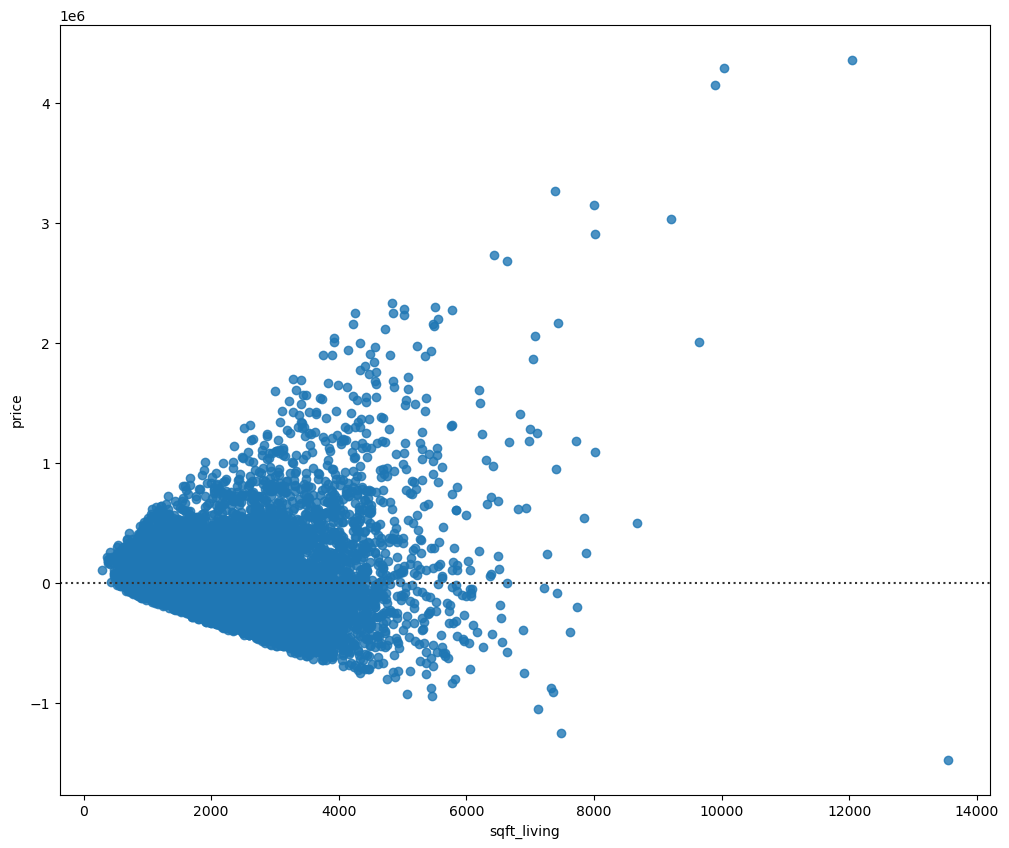

In [46]:
plt.figure(figsize=(12, 10))
sns.residplot(x = df['sqft_living'], y = df['price'])


## Multiple Linear Regression Model Visualization

In [47]:
# Get all predictor variables
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]  # 2d
Y = df['price']

# make our prediction
lm = LinearRegression()

lm.fit(X, Y)

Yhat = lm.predict(X)

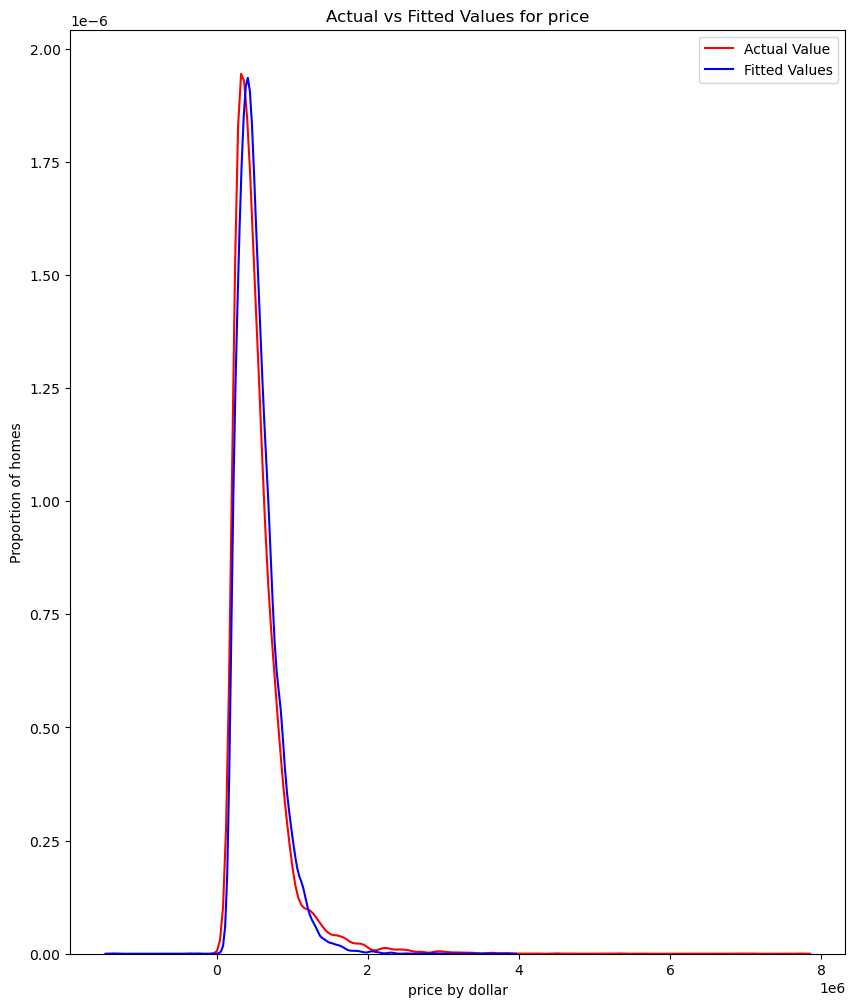

In [53]:
plt.figure(figsize=(10, 12))
#ax1 = sns.distplot(df['price'], hist=False, color='r', label = 'Actual Value')
#sns.distplot(Yhat, color='b', hist=False, label = 'Fitted Values', ax = ax1)

ax1 = sns.kdeplot(df['price'], color='r', label='Actual Value')
sns.kdeplot(data =Yhat, color='b', label='Fitted Values')

plt.title('Actual vs Fitted Values for price')
plt.xlabel('price by dollar')
plt.ylabel('Proportion of homes')
plt.legend()